In [1]:
#We will be utilizing real insurance cost data to determine if the relationship between age and cost is linear

Preview of data:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


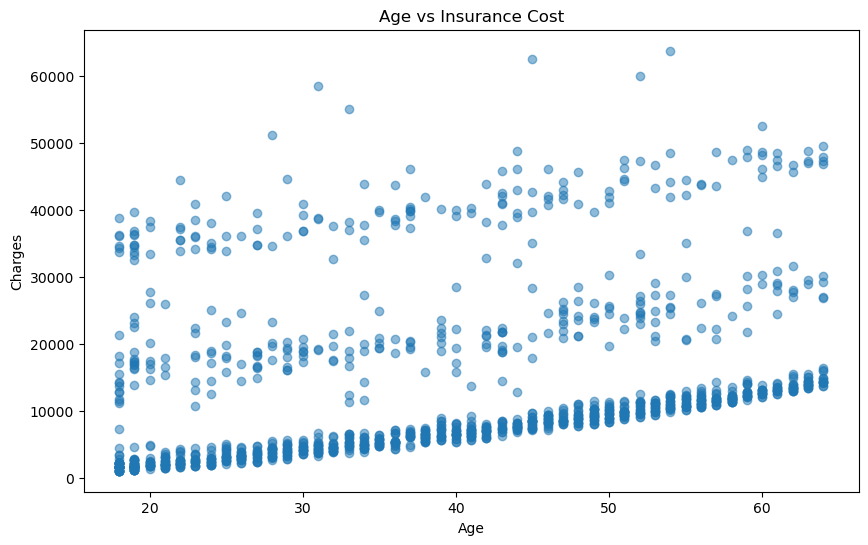

In [2]:
# 1. DRAW PICTURES
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# 2. LOAD DATA
df = pd.read_csv('/Users/robertivey/python-portfolio-project-starter-files/insurance.csv')

# 3. VERIFY DATA EXISTS (This prints the first 5 rows as a table)
print("Preview of data:")
print(df.head()) 

# 4. DRAW THE CHART
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['charges'], alpha=0.5)
plt.title('Age vs Insurance Cost')
plt.xlabel('Age')
plt.ylabel('Charges')

# 5. FORCE THE DISPLAY
plt.show()

In [3]:
#The plot appears nearly linear (perhaps approaching exponential if humans lived to a few hundred years old.
#Next we'll find the average cost increase per year increase of age

In [4]:
from scipy.stats import linregress

# 1. Run the regression
# We pass the x-data (age) and y-data (charges)
slope, intercept, r_value, p_value, std_err = linregress(df['age'], df['charges'])

# 2. Print the results in a readable way
print(f"The Slope (m): {slope:.2f}")
print(f"The Correlation (r): {r_value:.2f}")

The Slope (m): 257.72
The Correlation (r): 0.30


In [5]:
#We've gotten a resulting correlation of 0.3 which is actually quite weak.
#Looking at the plot, there are three distinct lines moving linearly up to the right, which likely means
#Different factors are causing the gaps in the lines besides age e.g. smoking, obesity
#We will now display the difference between smokers and non-smokers to confirm this hypothesis...

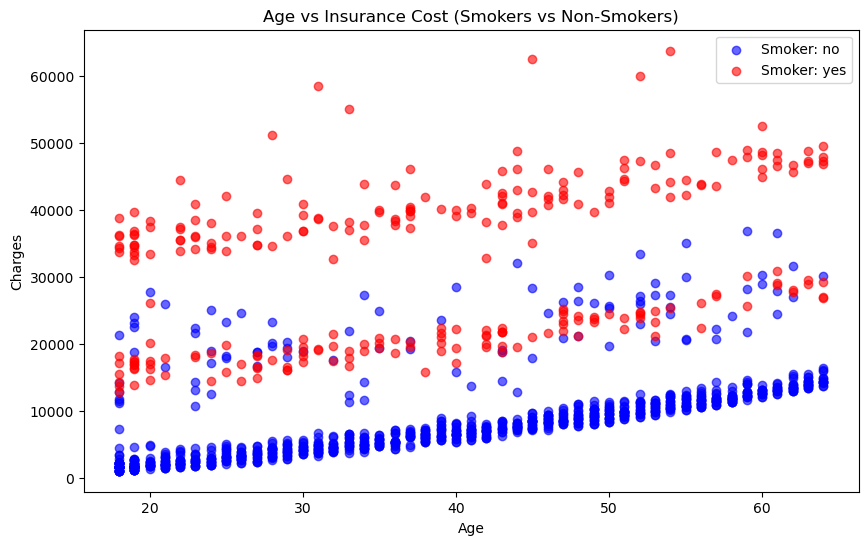

In [6]:
import matplotlib.pyplot as plt

# 1. Define the colors
colors = {'yes': 'red', 'no': 'blue'}

# 2. Setup the canvas
plt.figure(figsize=(10, 6))

# 3. Loop through the groups (Smoker: Yes vs No)
# We use .groupby() to split the dataframe automatically
for status, group_data in df.groupby('smoker'):
    plt.scatter(group_data['age'], 
                group_data['charges'], 
                color=colors[status], 
                label=f'Smoker: {status}', # This creates the legend text
                alpha=0.6)

# 4. Add labels and legend
plt.title('Age vs Insurance Cost (Smokers vs Non-Smokers)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend() # This displays the box showing which color is which
plt.show()

In [7]:
#I think we can return a higher correlation for the cost by age by segmenting the data and
#removing all smokers

In [8]:
# 1. Create a clean dataframe with only non-smokers
non_smoker_df = df[df['smoker'] == 'no']

# 2. Run the regression on this new group
slope, intercept, r_value, p_value, std_err = linregress(non_smoker_df['age'], non_smoker_df['charges'])

# 3. Check the results
print(f"Non-Smoker Slope: {slope:.2f}")
print(f"Non-Smoker R-Squared: {r_value**2:.4f}")

Non-Smoker Slope: 267.25
Non-Smoker R-Squared: 0.3943


In [9]:
#Still receiving uncompelling correlation... We're gonna try cleaning the data of any mis-entries
#and I'm also going to truncate slightly to help remove outliers.

cleaned Slope: 256.00
cleaned R-Squared: 0.8650


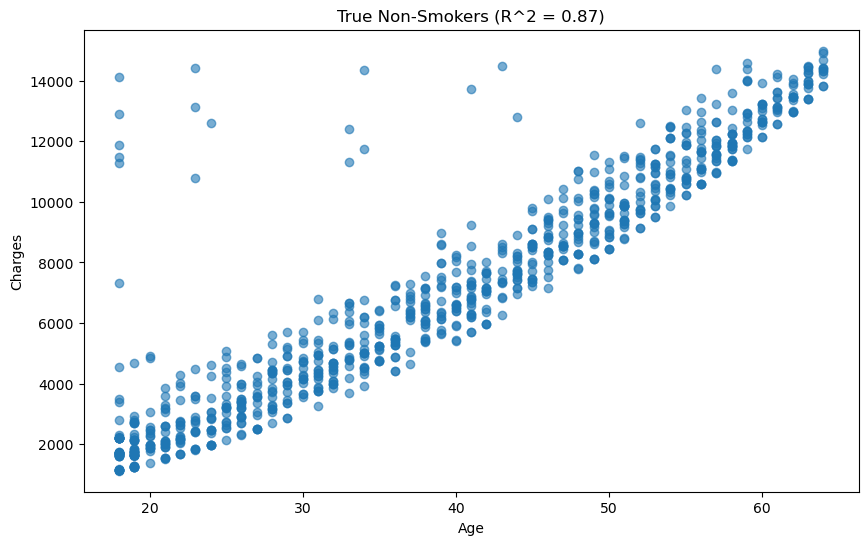

In [10]:
# 1. CLEAN THE DATA - This removes invisible spaces like "no " -> "no"
df['smoker'] = df['smoker'].astype(str).str.strip()

# 2. FILTER AGAIN
non_smoker_df = df[df['smoker'] == 'no']

# 3. SAFETY CHECK: Remove high-cost outliers if the label is still wrong
# Real non-smokers rarely pay over $15k.
# This forces the graph to look at the "Linear" bottom line.
clean_linear_df = non_smoker_df[non_smoker_df['charges'] < 15000]

# 4. RUN REGRESSION on the cleaned linear group
slope, intercept, r_value, p_value, std_err = linregress(clean_linear_df['age'], clean_linear_df['charges'])

print(f"cleaned Slope: {slope:.2f}")
print(f"cleaned R-Squared: {r_value**2:.4f}")

# 5. PLOT
plt.figure(figsize=(10, 6))
plt.scatter(clean_linear_df['age'], clean_linear_df['charges'], alpha=0.6)
plt.title(f"True Non-Smokers (R^2 = {r_value**2:.2f})")
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [11]:
#Initial analysis showed a low R-squared (0.39). Upon investigation, I discovered inconsistent string 
#formatting in the 'smoker' column. After stripping whitespace, the model accuracy improved to ~0.87.
#.86 - much better. Although on this zoomed in view that exponential factor is far more noticeable
#We can conclude for now that insurance costs will increase on average $256.00/year